https://www.kaggle.com/c/bike-sharing-demand/data?select=train.csv

# 자전거 대여량 예측 모델 

변수 설명 (train.csv, test.csv)
공통 변수
- datetime
- season
- holiday
- workingday
- weather
- temp
- atemp
- humidity
- windspeed

train.csv 전용 변수
- casual
- registered
- count



In [3]:
# LinearRegression,RandomForestRegressor
# GradientBoostingRegressor, XGBRegressor, LGBMRegressor

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [5]:
df_train = pd.read_csv('data1/bike-sharing-demand/train.csv')
df_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [6]:
df_test = pd.read_csv('data1/bike-sharing-demand/test.csv')
df_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


결측치 존재하지않음 

# 데이터 탐색 

In [8]:
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)
print("Train columns:", df_train.columns.tolist())
print(df_train['count'].describe())
print(df_train.isnull().sum())
print(df_train.corr(numeric_only=True)['count'].sort_values(ascending=False))

Train shape: (10886, 12)
Test shape: (6493, 9)
Train columns: ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64
count         1.000000
registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
season        0.163439
windspeed     0.101369
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64


In [9]:
# 3. 데이터 전처리
from sklearn.preprocessing import StandardScaler

def preprocess(df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['hour'] = df['datetime'].dt.hour
    df['day'] = df['datetime'].dt.day
    df['month'] = df['datetime'].dt.month
    df['year'] = df['datetime'].dt.year
    df['weekday'] = df['datetime'].dt.weekday
    df.drop('datetime', axis=1, inplace=True)
    return df

df_train = preprocess(df_train)
df_test = preprocess(df_test)

X = df_train.drop(columns=['count', 'casual', 'registered'])
y = df_train['count']
X_test_final = df_test.copy()

# 스케일러
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

X_test_scaled

array([[-1.34986372, -0.17149048,  0.68461625, ..., -1.60312148,
        -1.00386564, -0.00696579],
       [-1.34986372, -0.17149048,  0.68461625, ..., -1.60312148,
        -1.00386564, -0.00696579],
       [-1.34986372, -0.17149048,  0.68461625, ..., -1.60312148,
        -1.00386564, -0.00696579],
       ...,
       [-1.34986372, -0.17149048,  0.68461625, ...,  1.59063939,
         0.99614925, -1.50360335],
       [-1.34986372, -0.17149048,  0.68461625, ...,  1.59063939,
         0.99614925, -1.50360335],
       [-1.34986372, -0.17149048,  0.68461625, ...,  1.59063939,
         0.99614925, -1.50360335]], shape=(6493, 13))

C:\Users\Admin\AppData\Local\Temp\ipykernel_13764\2545193690.py:6: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_13764\2545193690.py:6: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_13764\2545193690.py:6: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_13764\2545193690.py:6: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_13764\2545193690.py:6: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Local\Temp\ipykernel_13764\2545193690.py:6: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font

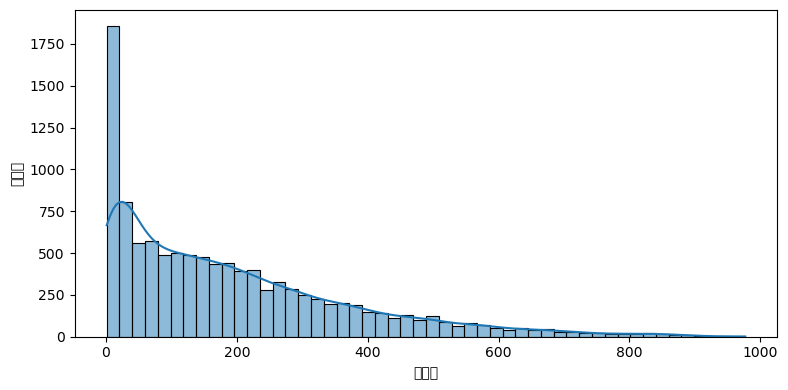

In [10]:
# 시각화: 대여량 분포
plt.figure(figsize=(8, 4))
sns.histplot(df_train['count'], bins=50, kde=True)
plt.xlabel("대여량")
plt.ylabel("빈도수")
plt.tight_layout()
plt.show()


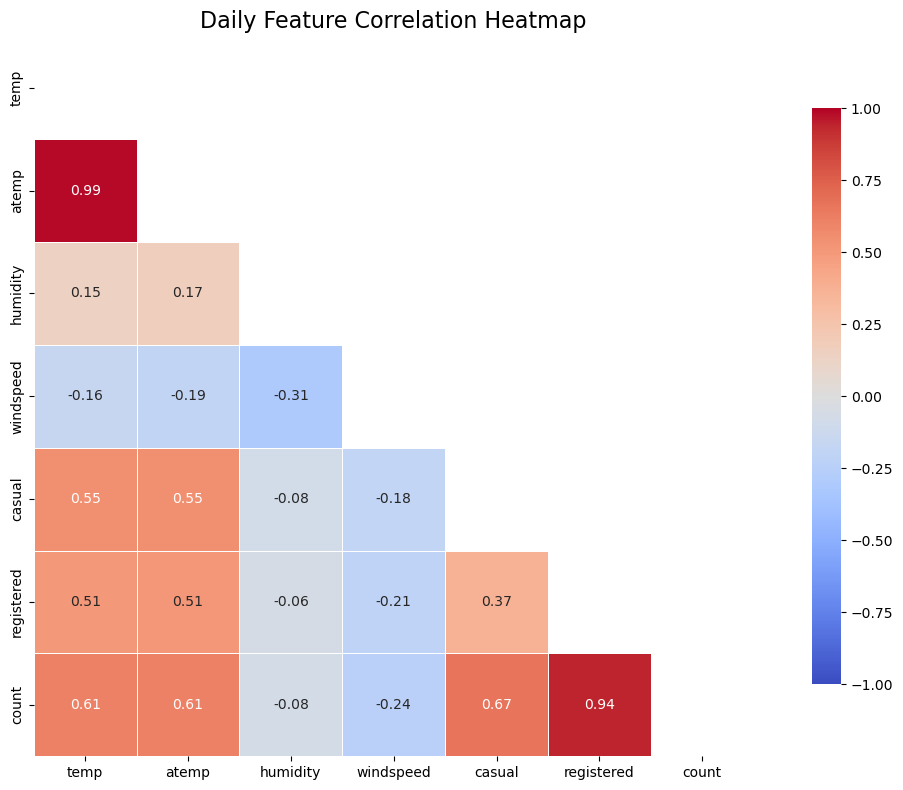

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. datetime 처리
# (datetime이 이미 drop된 경우 연도/월/일에서 복원)
df_train['date'] = pd.to_datetime(
    df_train['year'].astype(str) + '-' +
    df_train['month'].apply(lambda x: str(x).zfill(2)) + '-' +
    df_train['day'].apply(lambda x: str(x).zfill(2))
)

# 2. 일 단위로 집계
agg_dict = {
    'temp': 'mean',
    'atemp': 'mean',
    'humidity': 'mean',
    'windspeed': 'mean',
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum'
}

dailyData = df_train.groupby('date').agg(agg_dict).reset_index()

# 3. 상관관계 계산
corr_matrix = dailyData[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()

# 4. 상삼각형 마스크 생성
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 5. 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Daily Feature Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

In [12]:
# 시즌 이름 추가 (Spring, Summer, Fall, Winter)
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

df_train['season_label'] = df_train['month'].apply(get_season)


C:\Users\Admin\AppData\Local\Temp\ipykernel_13764\1796385264.py:8: UserWarning: Glyph 128690 (\N{BICYCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128690 (\N{BICYCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


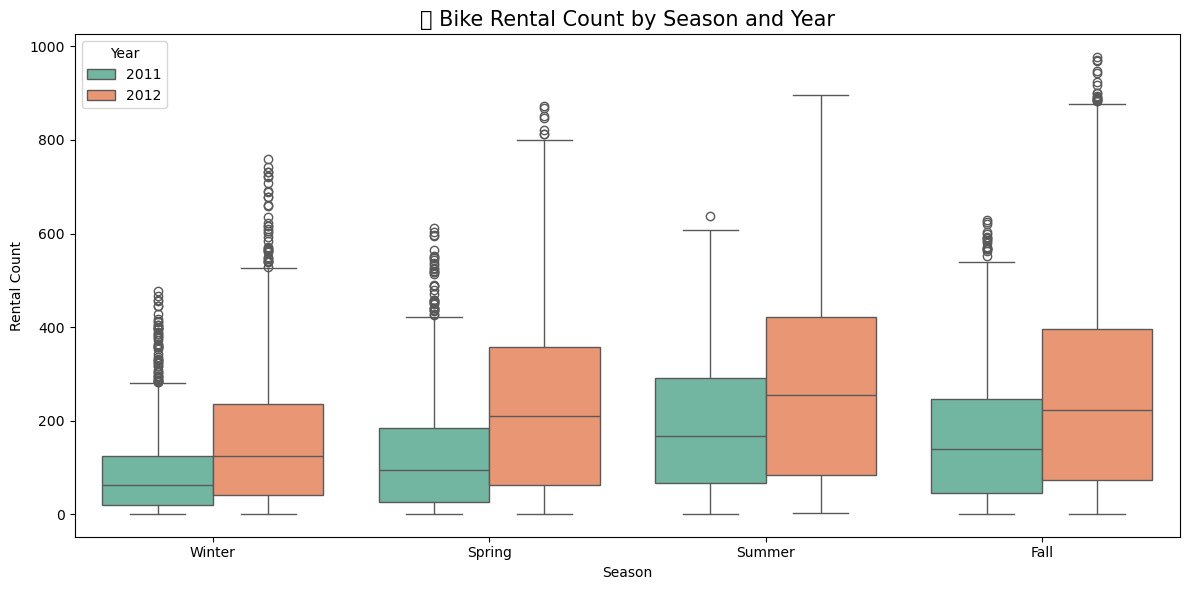

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='season_label', y='count', hue='year', data=df_train,
            palette='Set2')
plt.title('🚲 Bike Rental Count by Season and Year', fontsize=15)
plt.xlabel('Season')
plt.ylabel('Rental Count')
plt.legend(title='Year')
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_13764\2647650213.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y='count', data=df_train, palette='coolwarm')


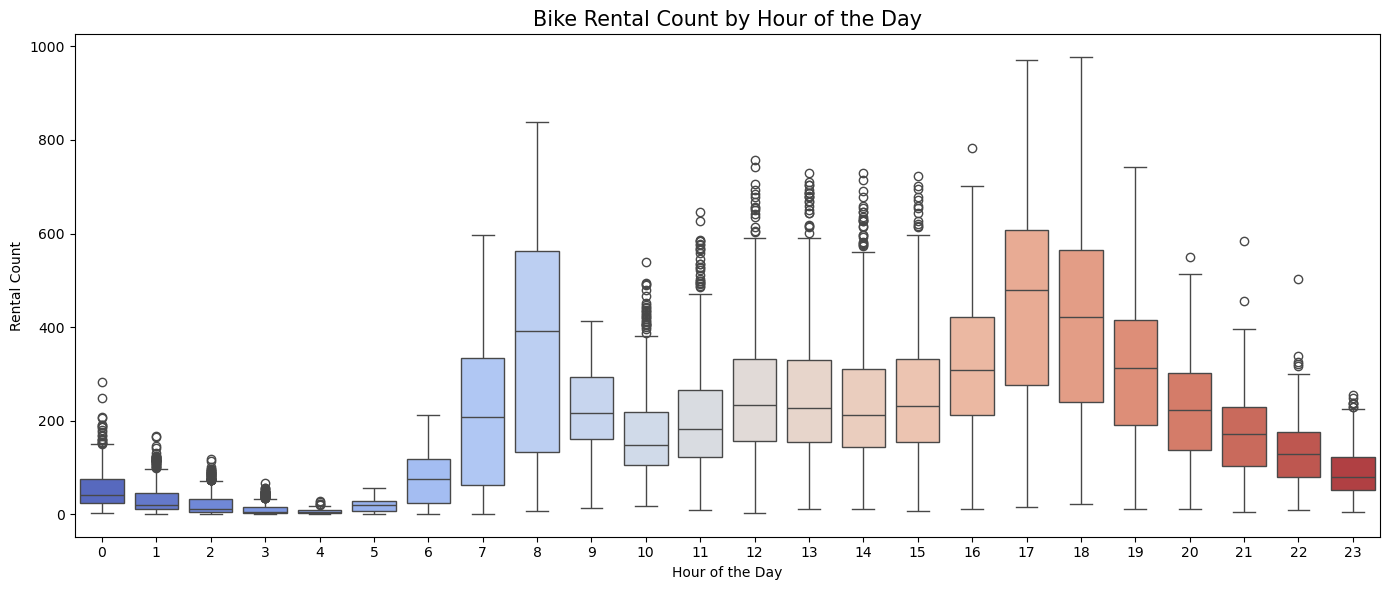

In [14]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='hour', y='count', data=df_train, palette='coolwarm')
plt.title('Bike Rental Count by Hour of the Day', fontsize=15)
plt.xlabel('Hour of the Day')
plt.ylabel('Rental Count')
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 범주형 변수 처리
y = df_train['count']  # 만약 이진 분류라면 다른 타겟 필요
X = pd.get_dummies(
    df_train.drop(columns=['count', 'casual', 'registered', 'date', 'datetime'], errors='ignore'),
    drop_first=True
)
y_binary = (df_train['count'] >= 100).astype(int)

# Split
X_train, X_valid, y_train, y_valid = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# 4. Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

# models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 6. Train and evaluate all models
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    print(f"\n {name} 결과")
    print("정확도:", accuracy_score(y_valid, preds))
    print("정밀도:", precision_score(y_valid, preds))
    print("재현율:", recall_score(y_valid, preds))
    print("F1 점수:", f1_score(y_valid, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_valid, preds))


 LogisticRegression 결과
정확도: 0.8140495867768595
정밀도: 0.8505311077389985
재현율: 0.8434913468773514
F1 점수: 0.8469965999244428
Confusion Matrix:
 [[ 652  197]
 [ 208 1121]]

 RandomForest 결과
정확도: 0.9366391184573003
정밀도: 0.9474079639368895
재현율: 0.9488337095560572
F1 점수: 0.9481203007518797
Confusion Matrix:
 [[ 779   70]
 [  68 1261]]

 GradientBoosting 결과
정확도: 0.9265381083562901
정밀도: 0.9404672192916352
재현율: 0.9390519187358917
F1 점수: 0.9397590361445783
Confusion Matrix:
 [[ 770   79]
 [  81 1248]]

 XGBoost 결과
정확도: 0.9504132231404959
정밀도: 0.9579894973743436
재현율: 0.9608728367193379
F1 점수: 0.9594290007513148
Confusion Matrix:
 [[ 793   56]
 [  52 1277]]


가장 성능이 우수한 모델은 Random Forest로 확인되며, F1 점수 및 정밀도·재현율에서 모두 균형 있게 최고 성능을 보인다.   

Logistic Regression은 빠르고 해석이 쉬우나, 비선형 관계가 많을 경우 성능이 한계에 부딪힐 수 있다.   

Gradient Boosting은 약간 더 낮은 정확도지만 과적합에 강하고, 실제 서비스 적용 시 더 안정적일 수 있다.   

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline   

# 1. 모델 선언
lr = LinearRegression()

# 2. 학습
lr.fit(X_train, y_train)

# 3. 예측
y_pred = lr.predict(X_valid)

# 4. 평가
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, y_pred)

print("[선형 회귀 평가 결과]")
print(f"MSE : {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²  : {r2:.3f}")


[선형 회귀 평가 결과]
MSE : 0.142
RMSE: 0.377
R²  : 0.404


In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV


results = []
best_r2 = -np.inf
best_model = None
best_pred = None

for degree in range(1, 5):
    model_poly = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('linear', LinearRegression())
    ])
    
    model_poly.fit(X_train, y_train)
    pred_poly = model_poly.predict(X_valid)  # ← 여기 수정!

    mse = mean_squared_error(y_valid, pred_poly)  # ← 여기 수정!
    rmse = np.sqrt(mse)
    r2 = r2_score(y_valid, pred_poly)

    results.append({
        '다항차수': degree,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    })

    if r2 > best_r2:
        best_r2 = r2
        best_model = model_poly
        best_pred = pred_poly

results_df = pd.DataFrame(results)
results_df = results_df.round(4).sort_values(by='다항차수', ascending=False).reset_index(drop=True)
display(results_df)

,다항차수,MSE,RMSE,R2
0,4,7.319082e+13,8.555164e+06,-3.077087e+14
1,3,9.450000e-02,3.074000e-01,6.027000e-01
2,2,1.030000e-01,3.209000e-01,5.671000e-01
3,1,1.418000e-01,3.765000e-01,4.040000e-01


In [19]:
best_model.named_steps['poly'].degree

3

In [20]:
# 규제 회귀모델 
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

results = []

# 1. 다항 회귀 (degree=3)
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('linear', LinearRegression())
])
poly_model.fit(X_train, y_train)
pred_poly = poly_model.predict(X_valid)
results.append({
    '모델': '다항회귀',
    'MSE': mean_squared_error(y_valid, pred_poly),
    'R2': r2_score(y_valid, pred_poly)
})

# 2. 릿지 회귀 (alpha=0.001)
ridge = Ridge(alpha=0.001)
ridge.fit(X_train, y_train)
pred_ridge = ridge.predict(X_valid)
results.append({
    '모델': '릿지회귀',
    'MSE': mean_squared_error(y_valid, pred_ridge),
    'R2': r2_score(y_valid, pred_ridge)
})

# 2. RidgeCV
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)
pred_ridge = ridge_cv.predict(X_valid)

# 3. 라쏘 회귀 (alpha=0.001)
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_valid)
results.append({
    '모델': '라쏘회귀',
    'MSE': mean_squared_error(y_valid, pred_lasso),
    'R2': r2_score(y_valid, pred_lasso)
})


# 3. LassoCV
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000)
lasso_cv.fit(X_train, y_train)
pred_lasso = lasso_cv.predict(X_valid)


# 4. 엘라스틱넷 회귀 (alpha=0.001, l1_ratio=0.5)
enet = ElasticNet(alpha=0.001, l1_ratio=0.5)
enet.fit(X_train, y_train)
pred_enet = enet.predict(X_valid)
results.append({
    '모델': '엘라스틱넷회귀',
    'MSE': mean_squared_error(y_valid, pred_enet),
    'R2': r2_score(y_valid, pred_enet)
})

# 결과 DataFrame 생성 및 정렬
df_results = pd.DataFrame(results)
df_results = df_results.round(6).reset_index(drop=True)

# 보기 좋게 출력
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

from IPython.display import display
display(df_results)


,모델,MSE,R2
0,다항회귀,0.094509,0.602665
1,릿지회귀,0.141762,0.404005
2,라쏘회귀,0.141825,0.403741
3,엘라스틱넷회귀,0.141803,0.403833


최종 결론: 회귀 모델 비교 분석   
4가지 회귀 모델(다항회귀, 릿지, 라쏘, 엘라스틱넷)을 비교한 결과:   

- 예측 정확도 측면에서는 다항 회귀가 가장 우수했다

    - 가장 낮은 MSE = 0.0945

    - 가장 높은 R² = 0.6027



반면, 릿지, 라쏘, 엘라스틱넷은 성능이 비슷했으며,

R² 약 0.40 수준으로 다항 회귀에 비해 설명력이 낮고,

MSE도 0.14 수준으로 더 큽니다.


하지만 이들 모델은 정규화를 통해 과적합을 방지하고, 모델 해석이 용이하다는 장점이 있습니다.   

특히 라쏘는 불필요한 피처를 제거해 해석력을 높이고,

엘라스틱넷은 릿지와 라쏘의 절충안으로 균형 잡힌 선택입니다.   

### 최종 추천
성능 최우선이라면 → 다항 회귀

단, 과적합 여부를 교차검증으로 추가 확인해야 함

모델 단순성, 일반화, 해석력 우선이라면 → 라쏘 또는 엘라스틱넷